In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import PSP


In [2]:
xy = np.load(open('PSP_DemoData1', 'rb'))
xy.shape

(180000, 2)

In [3]:
# Select subset of 30,000 points for analysis

maxpoints = 30000
x = xy[:maxpoints,0]
y = xy[:maxpoints,1]

x = x.reshape((-1,len(x)))
y = y.reshape((-1,len(y)))

# Compute similarity matrix

xdif = x - x.T
ydif = y - y.T
dist = np.sqrt(xdif**2 + ydif**2)

simmat = 1/(1 + dist)
    

In [5]:
# List of similarity thresholds

thlist = [0.15, 0.2, 0.3, 0.35]

cmlist = []

# Run PSP algorithm for the above list of thresholds
for th in thlist:
    cmlist.append(PSP.simClassMap(xy[0:maxpoints], simmat, th, verbose=False))

In [6]:
# Print summaries for each set of results

for i,cm in enumerate(cmlist):
    print('\nT = %.2f'% thlist[i])
    cm.print(maxlines=50)


T = 0.15
Class Prototype Count  Fraction      Totals
   1    14610  24788    0.826    24788    0.826
   2    13014   3391    0.113    28179    0.939
   3     6244   1696    0.057    29875    0.996
   4    10387     64    0.002    29939    0.998
   5    12850     46    0.002    29985    1.000
   6    21752      8    0.000    29993    1.000
   7     2319      5    0.000    29998    1.000
   8     5953      2    0.000    30000    1.000

T = 0.20
Class Prototype Count  Fraction      Totals
   1    20397  15904    0.530    15904    0.530
   2    23632  11166    0.372    27070    0.902
   3     4227   1058    0.035    28128    0.938
   4    19758    813    0.027    28941    0.965
   5    21846    516    0.017    29457    0.982
   6     9829    241    0.008    29698    0.990
   7      491    118    0.004    29816    0.994
   8    11507    110    0.004    29926    0.998
   9    28032     62    0.002    29988    1.000
  10     4505     10    0.000    29998    1.000
  11    21752      1    0.00

In [7]:
# Apply truncations that retain classes accounting for 99% of dataset

ntrunc = [5, 9, 20, 27]
for i,cm in enumerate(cmlist):
    print('\nT = %.2f'% thlist[i])
    cm.reassign()
    cm.sort()
    cm.truncate(ntrunc[i])
    cm.reassign()
    cm.sort()
    cm.print()


T = 0.15
Class Prototype Count  Fraction      Totals
   1     6244  10603    0.353    10603    0.353
   2    13014   8752    0.292    19355    0.645
   3    14610   7852    0.262    27207    0.907
   4    12850   1398    0.047    28605    0.954
   5    10387   1395    0.046    30000    1.000

T = 0.20
Class Prototype Count  Fraction      Totals
   1    23632   9143    0.305     9143    0.305
   2    20397   6494    0.216    15637    0.521
   3    19758   5585    0.186    21222    0.707
   4     4227   3443    0.115    24665    0.822
   5     9829   1904    0.063    26569    0.886
   6      491   1339    0.045    27908    0.930
   7    28032    768    0.026    28676    0.956
   8    11507    664    0.022    29340    0.978
   9    21846    660    0.022    30000    1.000

T = 0.30
Class Prototype Count  Fraction      Totals
   1    18745   5668    0.189     5668    0.189
   2    13218   4724    0.157    10392    0.346
   3    16359   4058    0.135    14450    0.482
   4    10555   1921  

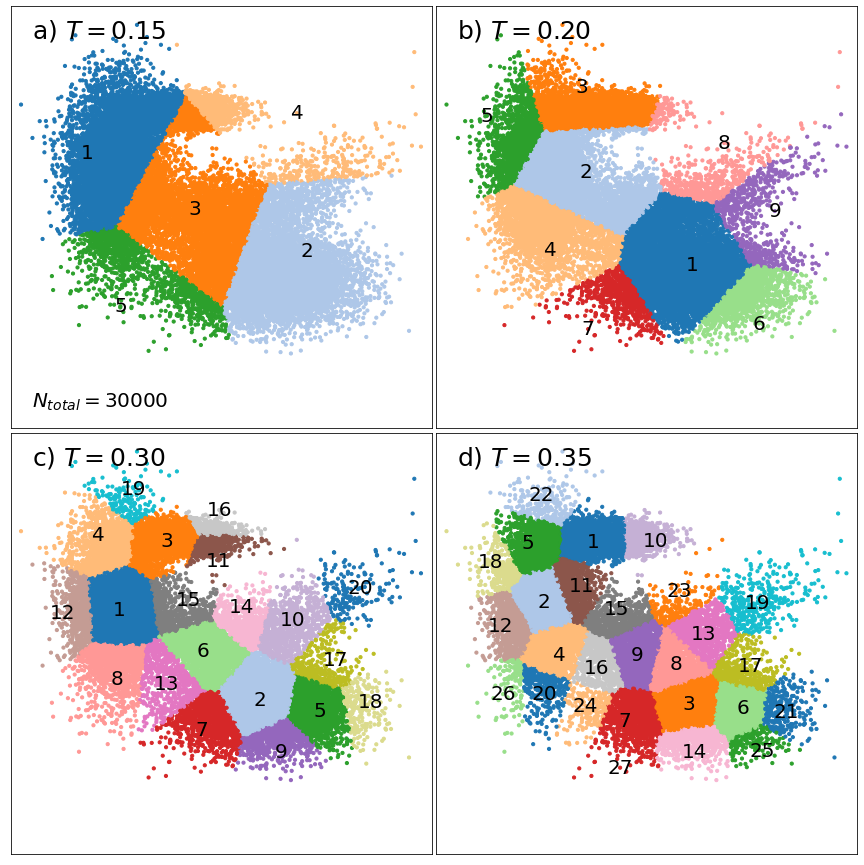

In [8]:
# Make Fig. 6

size = 10
npoints = 30000
cmap = matplotlib.cm.get_cmap('tab20')
nclasses = np.max(cm.map)

plt.figure(figsize=(12,13.25))

figs = ['a) ', 'b) ', 'c) ', 'd) ']
subs = [221, 222, 223, 224]

plt.subplot(221)

for icase in range(4):
    plt.subplot(subs[icase])
    
    cm = cmlist[icase]
    cA = np.copy(cm.map)
    cA = cA % 20
    plt.scatter(x, y, s=size, c=cA-0.3, cmap=cmap, vmin=0, vmax=20)
    plt.annotate(figs[icase]+'$T = $%.2f' % thlist[icase], (-9,8.5), fontsize=25)
    if icase==0: plt.annotate('$N_{total} = $%d' % (npoints) , (-9,-9), fontsize=20)
    
    xp1 = cm.data[cm.prototypes][:, 0]
    yp1 = cm.data[cm.prototypes][:, 1]
    for j in range(len(xp1)):
        plt.text( xp1[j],yp1[j], str(j+1), fontsize=20, ha='center', va='center')
    

    axes=plt.gca()
    axes.set_aspect('equal')
    plt.xticks([])
    plt.yticks([])
    plt.xlim([-10,10])
    plt.ylim([-10,10])


plt.subplots_adjust(left=0.01, bottom=0.01, right=0.99, top=0.90, wspace=0.01, hspace=0.01)
plt.savefig("Fig6.pdf")
plt.show()
